<table>
<tr style="border:none;">
<td style="border:none;"><a href="https://fra.utn.edu.ar/">
<image src="https://raw.githubusercontent.com/frautn/F2-electromagnetismo/main/assets_python/logoUTN-500.svg"  width="100">
</a></td>
<td style="border:none;">Física 2<br>2024<br>Electromagnetismo<br>Material para trabajo en clase
</td>
</tr>
</table> 

# Campo Eléctrico

<table>
<tr style="border:none;">
<td style="border:none;"><a href="https://creativecommons.org/licenses/by-nc-sa/4.0/deed.es"><image src="https://raw.githubusercontent.com/frautn/F2-electromagnetismo/main/docs/assets/img/by-nc-sa.svg" width="70" /></a></td>
<td style="border:none;">2024 Edgardo Palazzo (epalazzo@fra.utn.edu.ar)
</td>
</tr>
</table>

---

**Objetivos**
- Familiarizarse con la metodología de trabajo a través de ejemplos sencillos.
- Visualizar líneas de campo eléctrico de distintas distribuciones de cargas puntuales.

**Tabla de contenidos**<a id='toc0_'></a>    
- 1. [Campo de una carga](#toc1_)    
- 2. [Campo de un sistema de cargas puntuales](#toc2_)    
  - 2.1. [El dipolo eléctrico](#toc2_1_)    
  - 2.2. [Ejercicio 1: dos cargas](#toc2_2_)    
  - 2.3. [Más de dos cargas](#toc2_3_)    
  - 2.4. [Ejercicio 2: cargas en los vértices de un triángulo](#toc2_4_)    
- 3. [Visualización del campo en 3D](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys

np.seterr(divide='ignore')  # Elimina advertencia al dividir por cero.
%precision %.3f

# ------------------------------------
# Lo siguiente es necesario para que funcione en Google Colab.
try:
  import libem as em
except:
  # No descarga los archivos (aunque sí descarga .git)
  !git clone -n https://github.com/frautn/F2-electromagnetismo.git --depth 1
  !cd F2-electromagnetismo;git checkout HEAD modulos/libem.py
  sys.path.insert(0, 'F2-electromagnetismo/modulos')
  import libem as em

try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
  !pip --quiet install ipympl
  from google.colab import output
  output.enable_custom_widget_manager()
# Fin Google colab.
# ------------------------------------

# Figuras interactivas.
# Comentar si se quiere mantener las figuras luego de cerrar el cuaderno.
# %matplotlib widget


## 1. <a id='toc1_'></a>[Campo de una carga](#toc0_)

El campo eléctrico producido por una carga puntual $q_0$ ubicada en la posición $\vec{\text{x}}_0$ puede escribirse como:
$$
\vec{E}(\vec{\text{x}}) = \frac{1}{4\pi\varepsilon_0} \frac{q}{|\vec{\text{r}}|^2} \hat{\text{r}}\, , \tag{1}
$$
donde
  * $|\vec{\text{r}}|$ es la distancia entre la posición de la partícula cargada ($\vec{\text{x}}_0$) y la posición donde se quiere obtener el vector de campo eléctrico ($\vec{\text{x}}$)
  * $\hat{\text{r}}$ es el vector unitario en la dirección desde $\vec{\text{x}}_0$ hacia $\vec{\text{x}}$

según se muestra en la siguiente figura.
<div style="text-align: center;">
       <image src="https://raw.githubusercontent.com/frautn/F2-electromagnetismo/main/modulos/img/em01_una_carga.svg">
</div>

Si el vector unitario se reescribe como $\hat{r} = \vec{\text{r}}/|\vec{\text{r}}|$, la expresión para el campo resulta:
$$
\vec{E}(\vec{\text{x}}) = \frac{1}{4\pi\varepsilon_0} \frac{q}{|\vec{\text{r}}|^3} \vec{\text{r}}\, . \tag{2}
$$

Para escribir un código que calcule el campo eléctrico es conveniente utilizar una expresión con las coordenadas del punto campo y la posición de la carga explícitas. El código que utilizaremos reproduce la siguiente expresión:
$$
\vec{E}(x,y,z) = \frac{1}{4\pi\varepsilon_0} \frac{q}{\left ((x-x_0)^2 + (y-y_0)^2 + (z-z_0)^2 \right )^{3/2}} \left ( (x-x_0)\hat{i} + (y-y_0)\hat{j} + (z-z_0)\hat{k} \right ) . \tag{3}
$$

A continuación de define una función que calcula las componentes del campo eléctrico en la posición $(x,y,z)$ cuando se tiene una carga de $1~\text{nC}$ en el origen:

In [2]:
def E(x,y,z):
    """Calcula las componentes del campo eléctrico en N/C.
    Ingresar valores de x,y,z en metros y q en coulomb.
    """
    k = 9E9   #Constante de Coulomb en las unidades correspondientes.
    
    q = 1E-9
    x0 = 0
    y0 = 0
    z0 = 0

    r32 = ((x - x0)**2 + (y - y0)**2 + (z - z0)**2)**(3/2)
    Ei = k * q * (x - x0) / r32
    Ej = k * q * (y - y0) / r32
    Ek = k * q * (z - z0) / r32

    return Ei, Ej, Ek

Si queremos el vector campo eléctrico en alguna posición, simplemente se ingresan los valores de $x,y,z$:

In [3]:
E(-1,0,0)

(-9.000, 0.000, 0.000)

> Nota: El objetivo principal de esta serie de cuadernos es el cálculo de campos eléctricos.
> Por tal motivo los códigos para la creación de gráficos avanzados como el siguiente
> no se muestran explícitamente, y se importan de la librería ``libem.py``.

Veamos las líneas de campo de una única carga puntual:

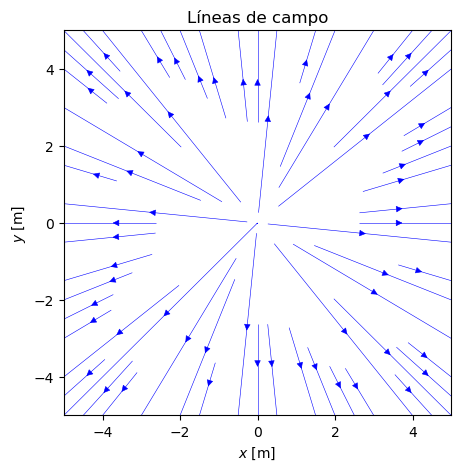

In [4]:
em.plotE(E)

## 2. <a id='toc2_'></a>[Campo de un sistema de cargas puntuales](#toc0_)

El campo total producido por un sistema de $N$ cargas puntuales es la suma de los campos de cada carga (ver ecuación (2) para el campo de una única carga):
$$
\vec{E}(\vec{\text{x}}) = \frac{1}{4\pi\varepsilon_0} \sum_{i=1}^N \frac{q_i}{|\vec{\text{r}}_i|^3} \vec{\text{r}}_i\, , \tag{4}
$$

donde
* $q_i$ es la carga eléctrica de la partícula i-ésima 
* $\vec{\text{r}}_i$ es el vector diferencia entre la posición donde se quiere obtener el vector de campo eléctrico ($\vec{\text{x}}$) y la posición de la partícula cargada ($\vec{\text{x}}_i$) : $\vec{\text{r}}_i = (x-x_i)\hat{i} + (y-y_i)\hat{j} + (z-z_i)\hat{k} $

### 2.1. <a id='toc2_1_'></a>[El dipolo eléctrico](#toc0_)

Un dipolo es un sistema de dos cargas eléctricas de igual valor absoluto pero signos opuestos, separadas por una distancia $d$. Para calcular el campo total podemos extender el código utilizado anteriormente agregando los datos de la segunda carga y sumando:

In [5]:
def E2(x,y,z):
    """Calcula las componentes del campo eléctrico en N/C de un sistema de 2 cargas.
    Ingresar valores de x,y,z en metros y q en coulomb.
    """
    k = 9E9   #Constante de Coulomb en las unidades correspondientes.

    q1 = -1E-9
    x1 = -2
    y1 = 0
    z1 = 0

    q2 = 1E-9
    x2 = 2
    y2 = 0
    z2 = 0

    r = ((x - x1)**2 + (y - y1)**2 + (z - z1)**2)**(3/2)
    Ei1 = k * q1 * (x - x1) / r
    Ej1 = k * q1 * (y - y1) / r
    Ek1 = k * q1 * (z - z1) / r

    r = ((x - x2)**2 + (y - y2)**2 + (z - z2)**2)**(3/2)
    Ei2 = k * q2 * (x - x2) / r
    Ej2 = k * q2 * (y - y2) / r
    Ek2 = k * q2 * (z - z2) / r

    return Ei1+Ei2, Ej1+Ej2, Ek1+Ek2

Verifiquemos que nuestro código funciona correctamente, calculando los vectores E en diferentes posiciones:

In [6]:
print("E(0,0,0) = ", E2(0,0,0))
print("E(1,0,0) = ", E2(1,0,0))
print("E(4,0,0) = ", E2(4,0,0))
print("E(-4,0,0) = ", E2(-4,0,0))
print("E(0,2,0) = ", E2(0,2,0))
print("E(0,0,2) = ", E2(0,0,2))
print("E(2,2,0) = ", E2(2,2,0))
print("E(-2,2,0) = ", E2(-2,2,0))
print("E(0,2,2) = ", E2(0,2,2))

E(0,0,0) =  (-4.5, 0.0, 0.0)
E(1,0,0) =  (-10.0, 0.0, 0.0)
E(4,0,0) =  (2.0, 0.0, 0.0)
E(-4,0,0) =  (2.0, 0.0, 0.0)
E(0,2,0) =  (-1.590990257669732, 0.0, 0.0)
E(0,0,2) =  (-1.590990257669732, 0.0, 0.0)
E(2,2,0) =  (-0.40249223594996214, 2.048753882025019, 0.0)
E(-2,2,0) =  (-0.40249223594996214, -2.048753882025019, 0.0)
E(0,2,2) =  (-0.8660254037844386, 0.0, 0.0)


Las líneas de campo eléctrico del dipolo:

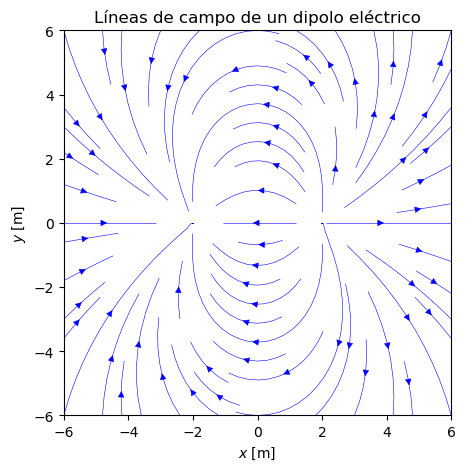

In [7]:
em.plotE(E2, dx=6, title='Líneas de campo de un dipolo eléctrico')

### 2.2. <a id='toc2_2_'></a>[Ejercicio 1: dos cargas](#toc0_)

Experimentar modificando la definición de la función E2 para obtener las líneas de campo de distintas configuraciones.

In [8]:
# Función E2 modificada para el ejercicio 1.

# def E2mod(x,y,z):
    # El nuevo código.



In [9]:
# Generar las líneas de campo.

# em.plotE(E2, dx=6, title='Ejercicio 1')

### 2.3. <a id='toc2_3_'></a>[Más de dos cargas](#toc0_)

El código que usamos anteriormente no es útil cuando se trabaja con muchas cargas.

Además, ahora las cargas pueden no formar un plano, y en ese caso el gráfico de las líneas de campo puede ser muy complicado. Por el momento trabajemos con cargas ubicadas en el plano $xy$, es decir $z=0$.

Para extender nuestro cálculo, en los parámetros de la función agregamos una lista con las cargas y sus posiciones.

In [10]:
def Ef(x, y, z, Q):
    """Calcula las componentes del campo eléctrico en N/C.
    Ingresar valores de x,y,z en metros y q en coulomb.
    Q es una lista de la forma:
    Q = [
        [q1,x1,y1,z1],
        [q2,x2,y2,z2],
        ...
        [qN,xN,yN,zN]
    ]
    """
    k = 9E9   #Constante de Coulomb en las unidades correspondientes.

    Ei,Ej,Ek = 0,0,0
    for qi in Q:
        r = ((x - qi[1])**2 + (y - qi[2])**2 + (z - qi[3])**2)**(3/2)
        Ei = Ei + k * qi[0] * (x - qi[1]) / r
        Ej = Ej + k * qi[0] * (y - qi[2]) / r
        Ek = Ek + k * qi[0] * (z - qi[3]) / r

    return Ei, Ej, Ek

A continuación se calcula el campo producido por 3 cargas: q1 = 5 nC en (0,0,0), q2 = -3 nC en (-2,0,0) y q3 = 7 nC en (2,3,0), en distintos puntos.

In [11]:
Q = [
    [5E-9,0,0,0],
    [-3E-9,-2,0,0],
    [7E-9,2,3,0],
]
print("E(1,0,0)  = ", np.round(Ef(1,0,0,Q), decimals=3))
print("E(1,-2,0) = ", np.round(Ef(1,-2,0,Q), decimals=3))
print("E(-4,0,0) = ", np.round(Ef(-4,0,0,Q), decimals=3))
print("E(0,0,2)  = ", np.round(Ef(0,0,2,Q), decimals=3))
print("E(0,2,0)  = ", np.round(Ef(0,2,0,Q), decimals=3))


E(1,0,0)  =  [40.008 -5.977  0.   ]
E(1,-2,0) =  [ 1.822 -9.274  0.   ]
E(-4,0,0) =  [ 2.685 -0.626  0.   ]
E(0,0,2)  =  [-4.184 -2.696 10.661]
E(0,2,0)  =  [-13.656   3.229   0.   ]


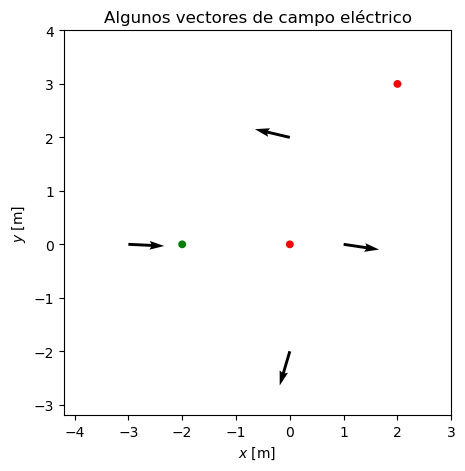

In [12]:
X = [[1,0,0],[0,-2,0],[-3,0,0],[0,2,0]]
em.plotEfvector(Ef, Q, X)

Veamos las líneas de campo de esta distribución.

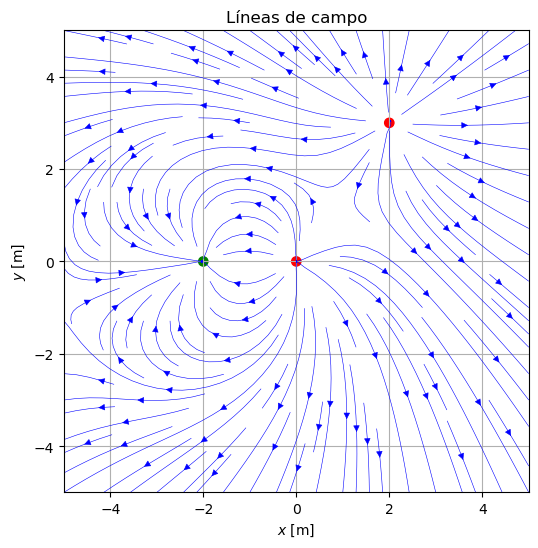

In [13]:
em.plotEf(Ef, Q, dx=5, density=1.2, figsize=(6,6))

### 2.4. <a id='toc2_4_'></a>[Ejercicio 2: cargas en los vértices de un triángulo](#toc0_)

Las cargas $q_1 = 2~\mu\text{C}$, $q_2 = -8~\mu\text{C}$ y $q_3 = 12~\mu\text{C}$ se colocan en los vértices de un triángulo equilátero, cuyos lados miden $10~\text{cm}$, como se muestra en la figura. Hallar el campo eléctrico en el punto $P$.  
<div style="text-align: center;">
       <image src="https://raw.githubusercontent.com/frautn/F2-electromagnetismo/main/modulos/img/em01_triangulo.svg" width="300">
</div>

Respuesta: $\vec{E} = \left (-36\hat{i} + 9.6\hat{j} \right ) \times 10^6~\text{N/C}$

1. Resolver el problema utilizando el código de esta sección.
1. Graficar las líneas de campo de esta distribución de cargas.
1. A partir del gráfico localizar posiciones donde el campo es aproximadamente: i) horizontal, ii) vertical. Verificar que sus elecciones de dichas posiciones sean correctas calculando el campo con la función que estamos utilizando.



In [14]:
# Cálculo de E en P
y = (0.10**2 - 0.05**2)**0.5
Q = [
    [2E-6,-0.05,0,0],
    [-8E-6,0,y,0],
    [12E-6,0.05,0,0],
]
Ef(0,0,0,Q)


(-36000000.000, 9600000.000, 0.000)

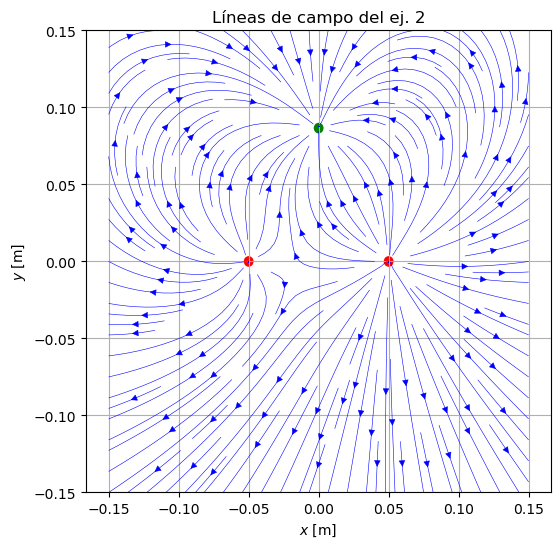

In [15]:
# Líneas de campo
em.plotEf(Ef, Q, dx=0.15, figsize=(6,6), density=1.5, title='Líneas de campo del ej. 2')

In [16]:
# Posición o posiciones donde E es horizontal



In [17]:
# Posición o posiciones donde E es vertical



## 3. <a id='toc3_'></a>[Visualización del campo en 3D](#toc0_)

Graficar líneas de campo en 3D es bastante complicado. En lugar de líneas de campo, en los ejemplos a continuación se muestran los vectores en diferentes puntos del espacio. Los vectores tienen todos la misma longitud, si se graficaran con las relaciones de longitudes correctas los gráficos resultarían incomprensibles.

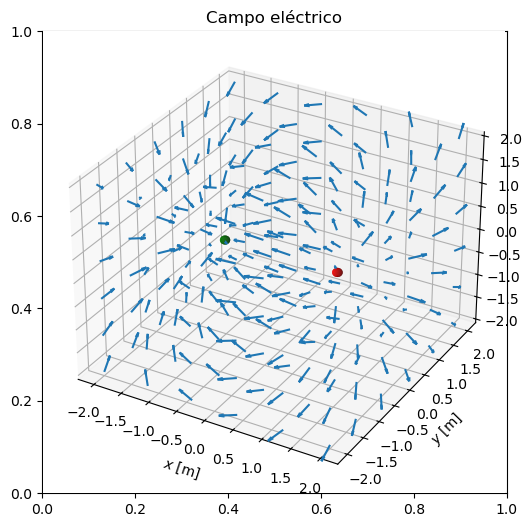

In [18]:
# El dipolo
Q = [
    [1E-9,1,0,0],
    [-1E-9,-1,0,0],
]

em.plotEfvector3d(Ef, Q, dx=2, w=6, figsize=(6,6))

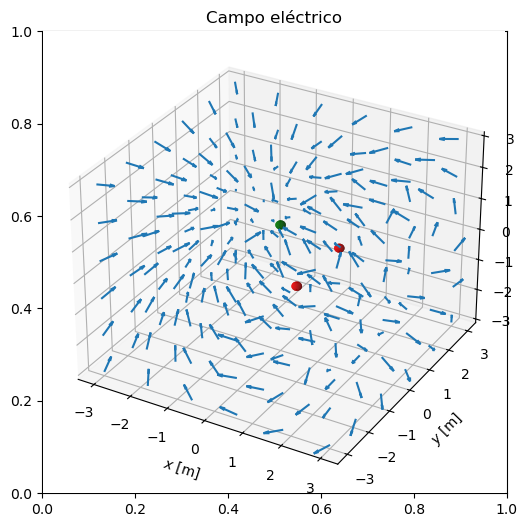

In [19]:
Q = [
    [1E-9,1,1,0],
    [1E-9,1,-1,0],
    # [1E-9,-1,1,0],
    # [1E-9,-1,-1,0],
    [-3E-9,0,0,1],
]

em.plotEfvector3d(Ef, Q, dx=3, w=6, figsize=(6,6))